<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Classification_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Submitted By:**  *Mohamamd Abdullah Tahir*<br>
**Submitted To:** *C. Guyeux*

**Introduction**<br>
This notebook aims to perform cancer detection using XGBoost classifier. The dataset used in this notebook is a collection of data on breast cancer tumor characteristics, such as the size, shape, and texture of the tumor, as well as patient demographic information. The dataset contains 569 instances, each representing a tumor, and 30 features that describe the characteristics of each tumor. The target variable is the diagnosis of the tumor, which can be either malignant or benign. The dataset is commonly used to develop and test machine learning models for predicting the diagnosis of breast cancer tumors based on their characteristics. This notebook will explore the dataset using various techniques, including data preprocessing, exploratory data analysis, and model building using XGBoost classifier. The results of these analyses will provide insights into the characteristics of breast cancer tumors and their potential for predicting the diagnosis of the tumor. Additionally, potential improvements for this notebook will be suggested to enhance its effectiveness in analyzing the breast cancer dataset.

**Dataset Description**<br>
The Breast Cancer datasets is available UCI machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

* 1= Malignant (Cancerous) - Present (M)
*  0= Benign (Not Cancerous) -Absent (B)

**Data Loading and Preprocessing**<br>
The first step is to load the dataset and preprocess it. This involves checking for any missing values, encoding the target variable, and scaling the features using min-max scaler.

**Exploratory Data Analysis**<br>
Some exploratory data analysis will be performed on the dataset. This will include printing the dimensions of the dataset, the number of null values, and summary statistics. Additionally, the distribution of the features will be visualized using histograms and a pairplot will be created to explore the relationships between the features.

**Model Building**<br>
The XGBoost classifier will be trained on the preprocessed dataset. The optimal hyperparameters will be determined using GridSearchCV. The model will be evaluated using confusion matrix, accuracy score, precision, and recall. The results of the model will be visualized using a graphviz library.

**Conclusion**<br>
This notebook provides a step-by-step guide for detecting cancer using XGBoost classifier. The results can be used for further analysis and interpretation to gain insights about the data.

**Proposed Improvements**<br>
The following improvements can be made to this notebook:<br>

 
*   Using interactive visualizations to make it easier to explore and understand the data. 

*   Comparing the performance of different classification algorithms to determine the best one for this dataset. Providing more insights and interpretations about the results obtained from classifying the data.





# Load libraries and read the data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import datset
data = pd.read_csv('/content/data.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All features are complete, only 'Unnamed: 32' is completely null, probably an error in the dataset, let's drop the unnecessary data

In [ ]:
data.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. From the graphs, we can see that **radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean** are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

# Exploratory Data Analysis (EDA)

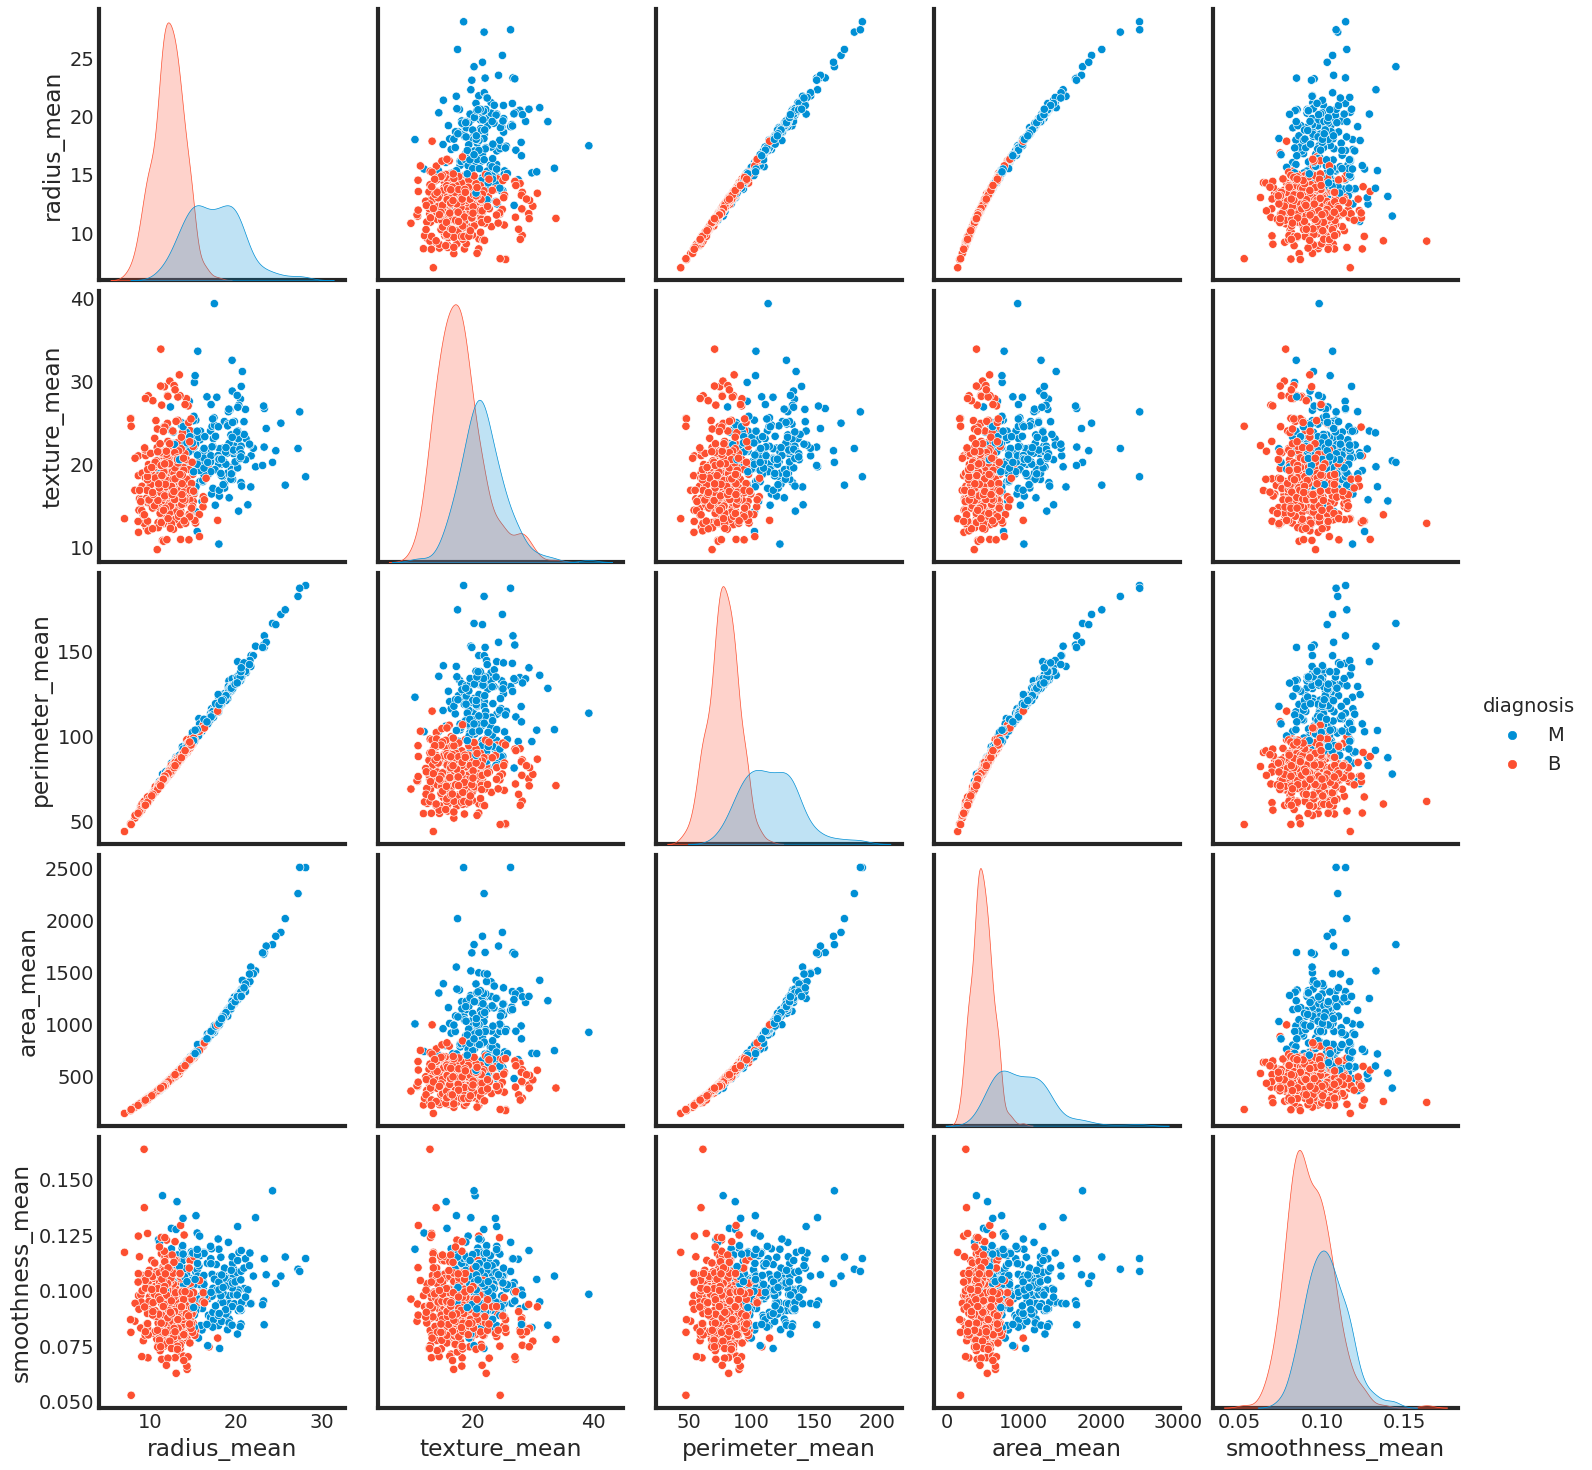

In [ ]:
#Visualizing Multidimensional Relationships
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(data[[data.columns[0], data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5]]], hue = 'diagnosis' , size=3)

Text(0.5, 0.98, 'Correlation Matrix')

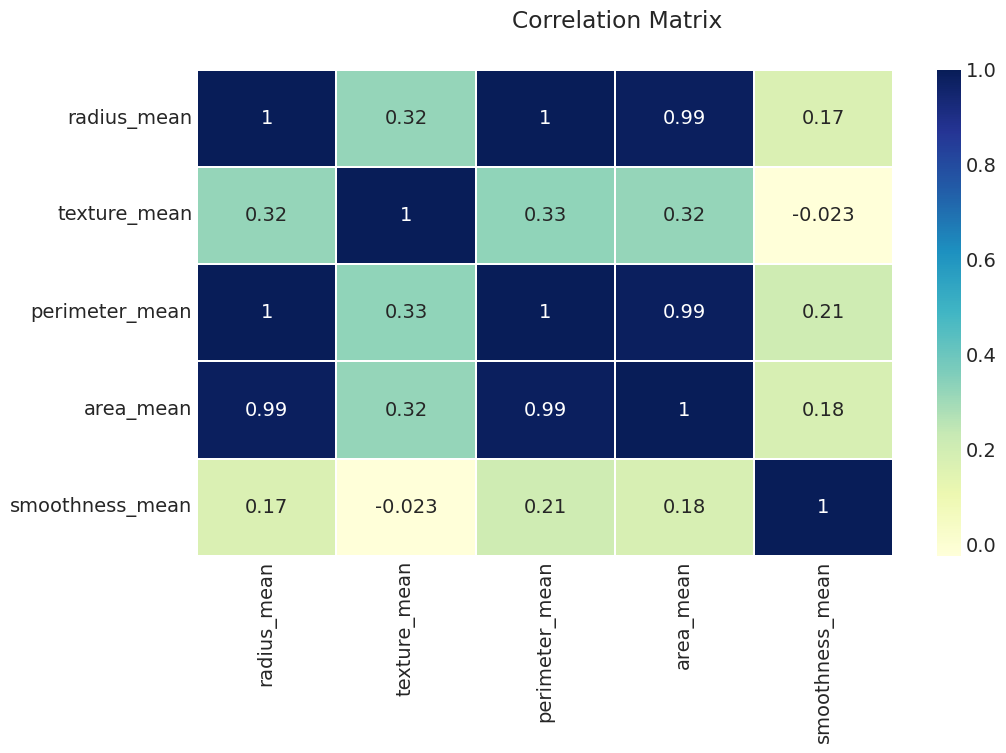

In [ ]:
#create the correlation matrix heat map
plt.figure(figsize=(10,6))
sns.heatmap(data[[data.columns[0], data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5]]].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')

# Data Preprocessing



Transform the 'M' and 'B' values (target variable) to 1 and 0 respectively. Following the encoding of the categorical features, we will continue with the normalization (scalling) of the numerical features. For this we will use the MinMax scalling method.

In [ ]:
# Transform the 'yes' and 'no' values (target variable) to 1 and 0 respectively
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

#Scalling
scaler =MinMaxScaler(feature_range=(0, 1))
scaled_data =  pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split the data to train and test sets
X = scaled_data.loc[:, scaled_data.columns != 'diagnosis']
y = scaled_data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

# Breast Cancer Prediction

In [ ]:
# Instantiate the XGBoost
xgb_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor=None,
              random_state=0, ...)


# Model Evaluation Metrics

<Axes: >

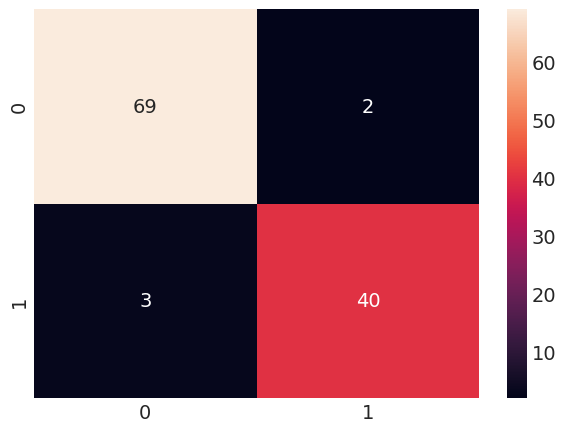

In [ ]:
# Assign the above probabilities to the corresponding class ('no', 'yes')
xgb_y_pred = xgb_cl.predict(X_test)
# Evaluate the model by using Recall/Precission:
cm = confusion_matrix(y_test, xgb_y_pred)
sns.heatmap(cm, annot=True)

<Axes: >

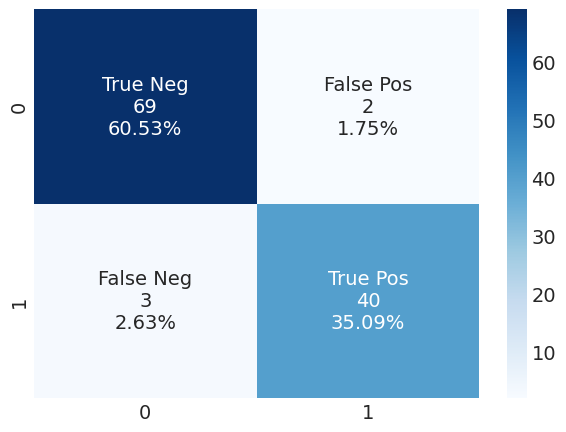

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
print('Accuracy Score of the XGBoost Classiifier is: ',accuracy_score(y_test,xgb_y_pred))
print('Recall Score of the XGBoost Classiifier is: ',recall_score(y_test, xgb_y_pred))
print('Precision Score of the XGBoost Classiifier is: ',precision_score(y_test, xgb_y_pred))

Accuracy Score of the XGBoost Classiifier is:  0.956140350877193
Recall Score of the XGBoost Classiifier is:  0.9302325581395349
Precision Score of the XGBoost Classiifier is:  0.9523809523809523


# Detail Conclusion

In this notebook, we used the Breast Cancer Wisconsin (Diagnostic) dataset to build an XGBoost classifier for detecting breast cancer tumors. We performed data preprocessing, exploratory data analysis using pairplot and correlation metrics, and feature scaling using MinMaxScaler. Then, we split the dataset into training and testing sets and trained the XGBoost classifier on the training set. Finally, we evaluated the performance of the classifier on the testing set using confusion matrix, accuracy score, recall score, and precision score.

The XGBoost classifier achieved an accuracy score of 0.956, recall score of 0.930, and precision score of 0.952, indicating a high level of performance in detecting breast cancer tumors. The classifier can be used as a valuable tool for diagnosing breast cancer tumors and could potentially save lives by enabling early detection of the disease.

#Graphical Reprentationof the Classifier

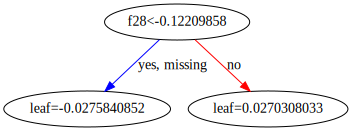

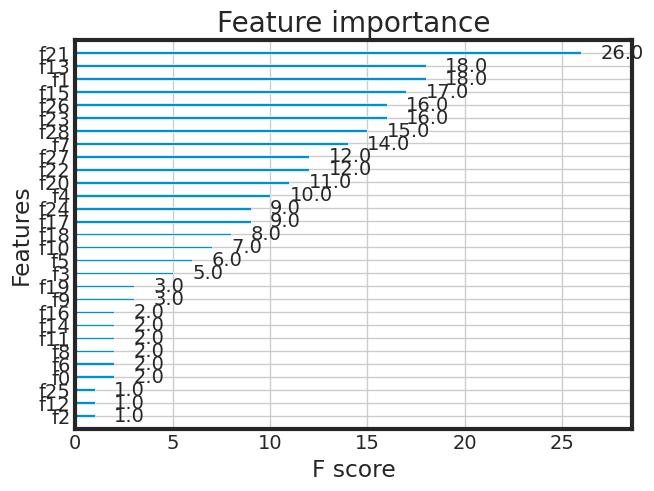

In [ ]:
import graphviz
xgb.plot_importance(xgb_cl)
# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_cl, num_trees=xgb_cl.best_iteration)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to pdf Classification_TP.ipynb